## All import statements

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# MSE: Mean Squared Error
moving from toy cost functions to a real regression cost: the Residual Sum of Squares (RSS) and its normalized form Mean Squared Error (MSE).

### RSS (intuition): sum of squared residuals:
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2 $$

Measures how much of the dependent variable’s variation the model does not explain.
RSS = 0 ⇒ perfect fit.

### MSE (why divide by n?):
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2 $$
MSE = average of the squared residuals; more numerically stable for large datasets.
Dividing by n keeps the magnitude of the cost manageable and helps avoid floating-point overflow when n is large.

Notation: h_\theta(x) (hypothesis) and \hat{y} (y-hat) are equivalent ways to denote predicted values. The course uses ŷ (y-hat) in code.

### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y}) \big)^2 $$

- **LaTeX** tips used in notebook:

\$$ ... \$$ for centered display math.

\sum_{i=1}^{n} for summation with limits.

\frac{1}{n} for fractions.

\hat{y} for y-hat.

\big( ... \big)^2 or \left( ... \right)^2 for large parentheses.

In [ ]:
# Practical impl. (Python):

# RSS (raw sum):
# rss = np.sum((y_true - y_pred)**2)
# MSE (recommended):
# mse = np.mean((y_true - y_pred)**2)
# or
# mse = np.sum((y_true - y_pred)**2) / len(y_true)

Use MSE in gradient descent to compute cost and gradients for linear regression.

Takeaway: use MSE as your cost when working with real datasets — it’s conceptually the same as RSS but safer numerically and comparable across dataset sizes.

**KEY TERMS / Questions**

RSS — total squared error (not averaged).

MSE - RSS divided by n — average squared error; preferred cost for regression.

ŷ (y-hat): symbol for predicted value (same as h_θ​(x)).

Overflow error: when computed numbers exceed floating-point limits; dividing by n reduces risk.

Practical question: when you implement gradient descent with MSE, are you using the vectorized gradient formula (fast) or computing gradients pointwise (slow)? (Vectorized is recommended.)

**Summary**

RSS measures total squared error; MSE is the average squared error (RSS / n). MSE is preferred for real datasets because averaging keeps cost magnitudes reasonable and helps avoid overflow when n is large. In notebooks, use LaTeX (\$$...\$$) to display RSS/MSE nicely. Implement MSE in Python with np.mean((y_true - y_pred)**2) and use it as the cost function in gradient descent.

## Work begins here:

In [2]:
# creating sample data:
x5= np.array([0.2, 1.6, 2.7, 4.0, 6.6, 7.5, 9.9])
y5= np.array([2.4, 1.9, 3.2, 3.0, 5.1, 6.7, 6.5])

print("Shape of x5:", x5.shape)
print("Shape of y5:", y5.shape)

Shape of x5: (7,)
Shape of y5: (7,)


- Both arrays are 1-D vectors with 7 samples.

- scikit-learn LinearRegression needs X as 2-D

- X must be shaped (n_samples, n_features) even if n_features == 1.

Two ways to convert a 1-D x_5 into the required 2-D X:

In [5]:
x5 = np.array([x5]).T       # double brackets + .T  => shape (7,1)
# or
# x5 = x5.reshape(7, 1)       # reshape(n_samples, n_features)

In [6]:
x5.shape

(7, 1)

(Note: many sklearn estimators accept y as a 1-D array (n_samples,); we can reshape y to (n_samples, 1) for consistency with how we access coef/intercept.)

In [8]:
y5 = np.array([y5]).T
y5.shape

(7, 1)

In [9]:
# Quick Linear Regression fit:
regr = LinearRegression()
regr.fit(x5, y5)

LinearRegression()

In [19]:
theta_0= regr.intercept_[0]
theta_1= regr.coef_[0][0]
print("Theta_0 (intercept):", theta_0)
print("Theta_1 (slope):", theta_1)

Theta_0 (intercept): 1.6463901749980385
Theta_1 (slope): 0.5315467315388841


## Plotting time

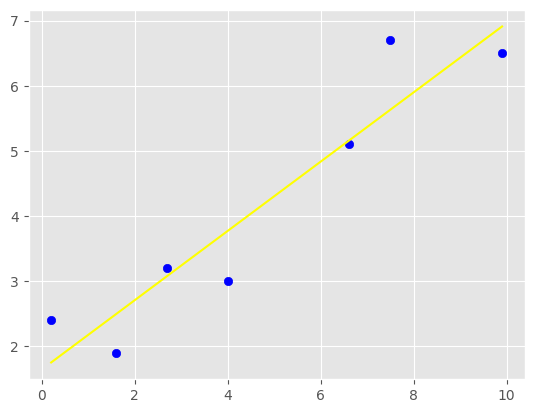

In [18]:
plt.scatter(x5, y5, color='blue')
plt.plot(x5, regr.predict(x5), color= 'yellow')
plt.style.use('ggplot')
plt.show()

- Reminder: this plot is of data (x,y), not the cost surface over θ parameters.

- Important conceptual distinction:

Previous lessons plotted cost functions in parameter space (e.g., cost as a function of θ₀, θ₁).

Here we plot data & fitted line (x → ŷ). The cost surface depends on θ values, not the x/y axes of this plot.

**KEY TERMS / Questions**

- X shape requirement: X must be 2-D (n_samples, n_features). Use .reshape(n,1) or np.array([x]).T.

- y shape: sklearn commonly accepts y as 1-D (n_samples,). Lesson used (n_samples, 1)—be consistent with how you index intercept_ / coef_.

- regr.intercept_ / regr.coef_: intercept is often an array ([b]) and coef is an array (shape (1,1) for single feature) — index accordingly.

- ŷ (y-hat): predicted values from the model regr.predict(X).

- Question to check: do you pass y as 1-D or 2-D in your code? If 2-D, remember how you index intercept_ and coef_.

**Summary**

You generated a small sample dataset (x_5, y_5), learned that scikit-learn requires the feature matrix X to be 2-D, and saw two ways to convert a 1-D vector into (n_samples, 1) (.reshape or double brackets + .T). You fitted a LinearRegression model, extracted the intercept and slope (θ₀, θ₁), and plotted the data with the fitted line. Finally, you were reminded of the key conceptual difference: the regression plot shows data and predictions (x → ŷ), whereas earlier lessons were plotting cost surfaces in parameter (θ) space.

## Implementing MSE concept

In [25]:
y_hat = theta_0 + theta_1 * x5
print(y_hat.shape)
print("Estimated values of y (y_hat):\n", y_hat)
print("Actual values of y:\n", y5)
print("Differences between these:\n", abs(y5 - y_hat))

(7, 1)
Estimated values of y (y_hat):
 [[1.75269952]
 [2.49686495]
 [3.08156635]
 [3.7725771 ]
 [5.1545986 ]
 [5.63299066]
 [6.90870282]]
Actual values of y:
 [[2.4]
 [1.9]
 [3.2]
 [3. ]
 [5.1]
 [6.7]
 [6.5]]
Differences between these:
 [[0.64730048]
 [0.59686495]
 [0.11843365]
 [0.7725771 ]
 [0.0545986 ]
 [1.06700934]
 [0.40870282]]


In [29]:
def mse_calc(y, y_hat):
    # return 1/y.size * sum((y - y_hat)**2)
    return np.mean((y - y_hat)**2, axis=0)

In [33]:
result= mse_calc(y5, y_hat)
print("MSE calculated manually:", result[0])
print("MSE calculated via sklearn with manually calculated y_hat values:\n",
      mean_squared_error(y5, y_hat))
print("MSE calculated via sklearn with regr.predict() values:\n",
      mean_squared_error(y5, regr.predict(x5)))

MSE calculated manually: 0.384953644017444
MSE calculated via sklearn with manually calculated y_hat values:
 0.384953644017444
MSE calculated via sklearn with regr.predict() values:
 0.384953644017444
